# Iris Species Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Setup Data

In [2]:
# Load and view data info
iris_df = pd.read_csv("iris.csv")

print(iris_df.head(), end="\n\n")
print(iris_df.info())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


## EDA

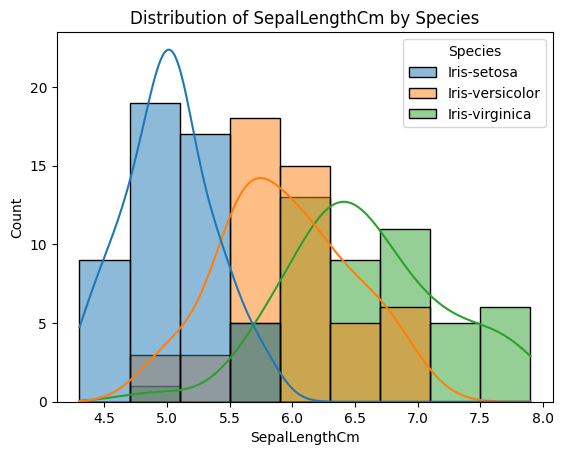

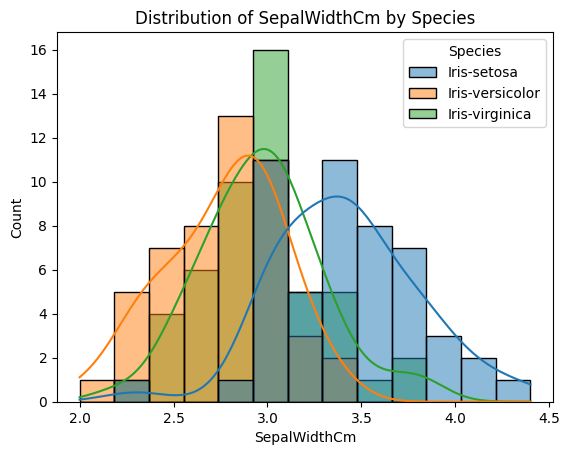

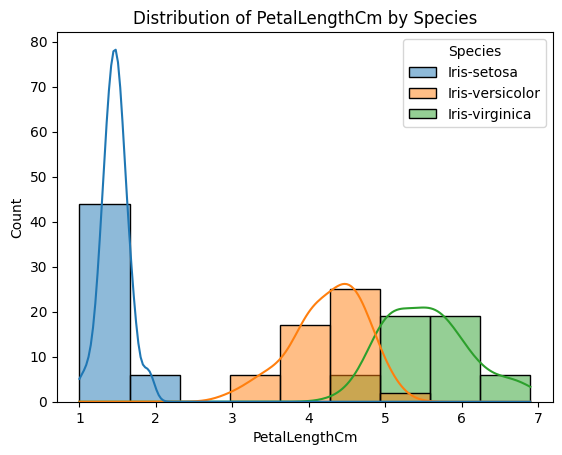

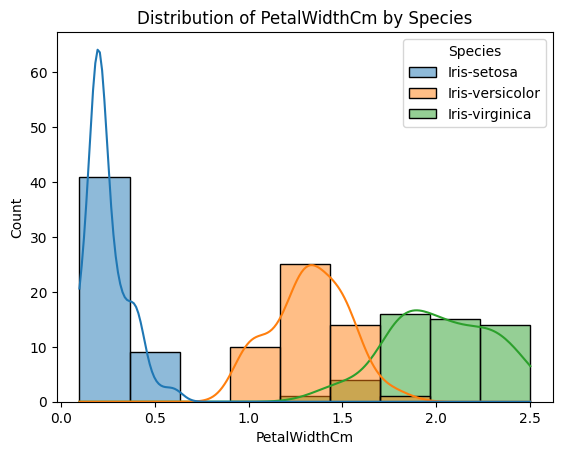

In [3]:
# Histograms
for col in ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']:
    sns.histplot(data=iris_df, x=col, hue='Species', kde=True)
    plt.title(f"Distribution of {col} by Species")
    plt.show()

From the histograms, we can tell that there are lots of overlaps between species for sepal length and width. However, the distributions are more separated for petal length and width. 

Hence, this suggests that petal information carry more information than sepal width when distinguishing between the Iris species

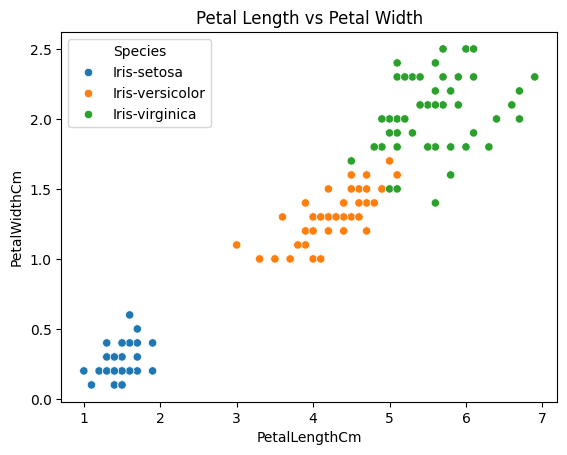

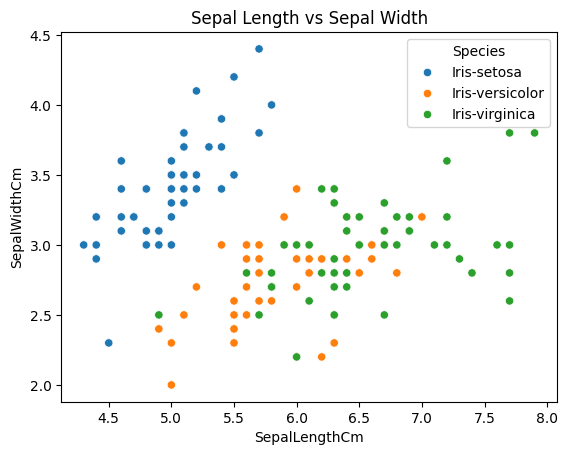

In [4]:
# Scatterplots
sns.scatterplot(data=iris_df, x='PetalLengthCm', y='PetalWidthCm', hue='Species')
plt.title("Petal Length vs Petal Width")
plt.show()

sns.scatterplot(data=iris_df, x='SepalLengthCm', y='SepalWidthCm', hue='Species')
plt.title("Sepal Length vs Sepal Width")
plt.show()

From the scatterplots above, we can identify that there are clear separation between the species for petal information compared to sepal information. This goes to show that petal information is a stronger predictor of species than sepal. 

## Data Splits

In [5]:
# Stratified data splitting

# Separate features (X) and labels (y)
X = iris_df.drop('Species', axis=1)
y = iris_df['Species']

# 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,             
    random_state=42,
    stratify=y        # Maintain species proportions when splitting data
)

In [6]:
# Encode labels (species) that are text into numericals
encoder = LabelEncoder()

encoder.fit(y) # Stores all unique labels in array
labels = encoder.transform(encoder.classes_) # [0, 1, 2]
names  = encoder.classes_ # ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

# Apply label mappings
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

# Scale features, ensure they are on a similar scale 
# Fit: Calculates mean, std of each column 
# Transform: Use those numbers to scale each value to make them standardised
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit and transform on training data
X_test = scaler.transform(X_test)        # Transform test data using same scaling

## Model Development

In [7]:
# Training
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

svm = SVC(kernel='rbf', C=1)
svm.fit(X_train, y_train)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Testing
y_pred_knn = knn.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_rf = rf.predict(X_test)


## Evaluation

In [15]:
print("kNN Report")
print(classification_report(y_test, y_pred_knn, labels=labels, target_names=names))
print("SVM Report")
print(classification_report(y_test, y_pred_svm, labels=labels, target_names=names))
print("RF Report")
print(classification_report(y_test, y_pred_rf, labels=labels, target_names=names))

results = pd.DataFrame({
    'Model': ['kNN', 'SVM', 'RF'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_rf)
    ]
})

print(results)

# Identify incorrect predictions
misclassified = np.where(y_test != y_pred_knn)[0][0]
print("Indices of misclassified samples:", misclassified)
print("True label:", encoder.inverse_transform([y_test[misclassified]])[0])
print("Predicted label:", encoder.inverse_transform([y_pred_knn[misclassified]])[0])


kNN Report
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.94      1.00      0.97        15
 Iris-virginica       1.00      0.93      0.97        15

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

SVM Report
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        15
 Iris-virginica       1.00      1.00      1.00        15

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

RF Report
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00   

## Analysis

Best Model(s):
- SVM and RF performed the best overall, with every metric scoring 100%
Hardest species to predict:
- Virginica and Versicolor are the harder species to detect and it can be shown from the scatterplot above, as they have so much overlaps between the features. 
